In [1]:
# main.py
import pandas as pd
import numpy as np
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import csv
import mdl_analysis as analysis

# Загрузка категорий
file_path_categories = "/content/sample_data/categories.csv"
category_list = loader.load_csv_file(file_path_categories)
# Загрузка тренировочного датасета
file_path = "/content/sample_data/train.csv"
dataset = loader.load_csv_file(file_path)
# Загрузка тестового датасета
file_path = "/content/sample_data/test.csv"
datasettest = loader.load_csv_file(file_path)


Данные успешно загружены.
Данные успешно загружены.
Данные успешно загружены.


In [2]:
# Вывод статистической информации
analysis.statistic_data(category_list)
analysis.statistic_data(dataset)

Первые 5 записей:
    CategoryID                        CategoryName
0           0                             Монитор
1           1                Мультимедиа акустика
2           2                Портативная акустика
3           3  Чехол/защитное стекло для телефона
4           4                   Мобильный телефон

Последние 5 записей:
     CategoryID                        CategoryName
62          62                 Виниловая пластинка
63          63                          ТВ-антенна
64          64  Оборудование для предметной съемки
65          65              Аксессуар для ноутбука
66          66                     Металлодетектор

Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    67 non-null     int64 
 1   CategoryName  67 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None

Статистичес

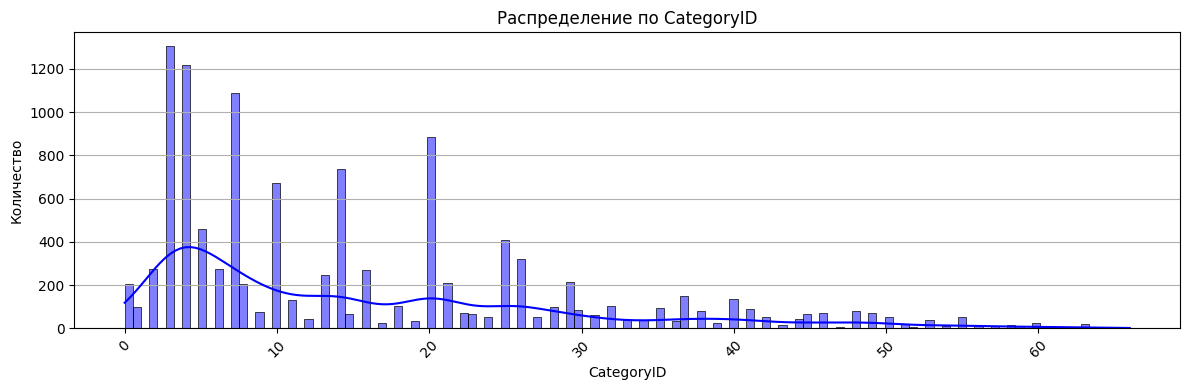

In [5]:
# Распределение по классу
column = 'CategoryID'
analysis.visual_by_feature(dataset, column)

In [6]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# Файл предобработки датасета (mdl_preprocessing.py)
# Предобработка текстовых данных
import spacy
nlp = spacy.load('ru_core_news_sm')

# Удаления знаков препинания и преведение к нижнему регистру
def clean_text(dataset):
  for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].str.lower()
    dataset[col] = dataset[col].str.replace(r'[^\w\s]', '', regex=True)
    return dataset

# Удаления стоп-слов
stop_words = ['и', 'или', 'для', 'на', 'под', 'с', 'который', 'которая', 'которые']
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Лемматизации
def lemmatize_text_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

dataset = clean_text(dataset)
dataset['Query'] = dataset['Query'].apply(remove_stopwords)
dataset['Query'] = dataset['Query'].apply(lemmatize_text_spacy)

print(dataset[:10])

   ID  CategoryID                                    Query
0   1           1                                  edifier
1   2           2        умный колонка яндекс станция лайт
2   3           3                      чехол iphone 14 pro
3   4           4                                      zte
4   5           5   ноутбук huawei matebook b3520 53012kfg
5   6           1        мультимедиа акустик sven ms2050bl
6   7           6               ssd samsung 870 evo 500 gb
7   8           7                кабель переходники baseus
8   9           8  переходник сетевой robiton travelenergy
9  10           9                  держатель смартфон авто


In [8]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [9]:
# Файл предобработки датасета (mdl_preprocessing.py)
# Токенизация
import spacy
import pandas as pd
nlp = spacy.load('ru_core_news_sm')

def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

dataset['tokens'] = dataset['Query'].apply(spacy_tokenize)
print(dataset[:10])

   ID  CategoryID                                    Query  \
0   1           1                                  edifier   
1   2           2        умный колонка яндекс станция лайт   
2   3           3                      чехол iphone 14 pro   
3   4           4                                      zte   
4   5           5   ноутбук huawei matebook b3520 53012kfg   
5   6           1        мультимедиа акустик sven ms2050bl   
6   7           6               ssd samsung 870 evo 500 gb   
7   8           7                кабель переходники baseus   
8   9           8  переходник сетевой robiton travelenergy   
9  10           9                  держатель смартфон авто   

                                         tokens  
0                                     [edifier]  
1       [умный, колонка, яндекс, станция, лайт]  
2                      [чехол, iphone, 14, pro]  
3                                         [zte]  
4  [ноутбук, huawei, matebook, b3520, 53012kfg]  
5        [мультим

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9239
Recall: 0.9239
Precision: 0.9319
Marko f1: 0.8473
Matrix: [[51  0  0 ...  0  0  0]
 [ 0 17  1 ...  0  0  0]
 [ 0  1 46 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
Time: 6.3016s


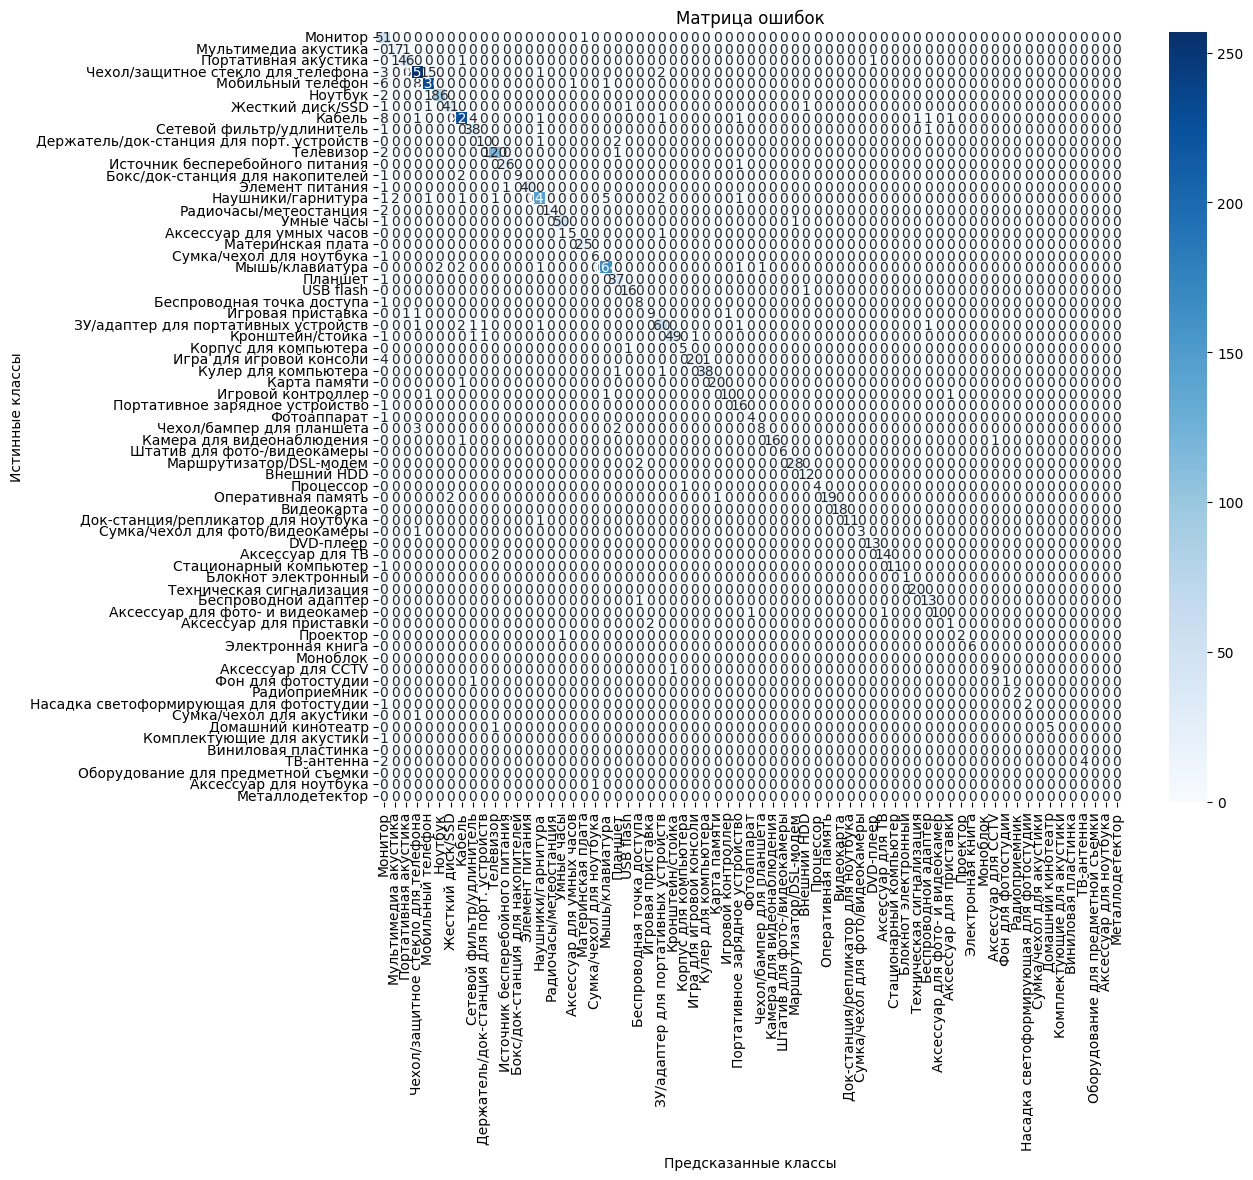

In [10]:
# Файл обучения и предсказания моделей (mdl_classifier.py)
# Классификатор LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns

tokenized_texts = dataset['tokens'] # Все столбцы, кроме CategoryID
categories = dataset['CategoryID'] # Только столбец CategoryID

# Разделение данных на обучающую и тестовую выборки
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(
    tokenized_texts, categories, test_size=0.2, random_state=42
)

# Создаем TF-IDF векторизатор с настройками
vectorizer = TfidfVectorizer(
    max_features=5,        # Ограничение по количеству признаков
    ngram_range=(1, 2)
)

# Векторизация токенов
vectorizer = CountVectorizer(analyzer=lambda x: x)
X_train = vectorizer.fit_transform(X_train_tokens)
X_test = vectorizer.transform(X_test_tokens)

# Создание модели LogisticRegression
lr_classifier = LogisticRegression(random_state=42,
                                   C=10,
                                   class_weight='balanced',
                                   fit_intercept=False,
                                   max_iter=100,
                                   penalty='l2',
                                   solver='liblinear')

# Время начала обучения
time_start = time.time()

# Обучение модели на обучающем наборе данных
lr_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = lr_classifier.predict(X_test)

# Время обучения
times = time.time() - time_start

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Marko f1: {macro_f1:.4f}')
print(f'Matrix: {conf_matrix}')
print(f'Time: {times:.4f}s')

# Визуализация матрицы ошибок
id_to_name = pd.Series(category_list['CategoryName'], index=category_list['CategoryID']).to_dict()
labels = category_list['CategoryName'].tolist()
y_true_names = [id_to_name[id_] for id_ in y_test]
y_pred_names = [id_to_name[id_] for id_ in y_pred]

conf_matrix = confusion_matrix(y_true_names, y_pred_names, labels=labels)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Accuracy: 0.92
Recall: 0.92
Precision: 0.93
Marko f1: 0.85
Matrix: [[51  0  0 ...  0  0  0]
 [ 0 17  1 ...  0  0  0]
 [ 0  1 46 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
Time: 269.9579517841339s


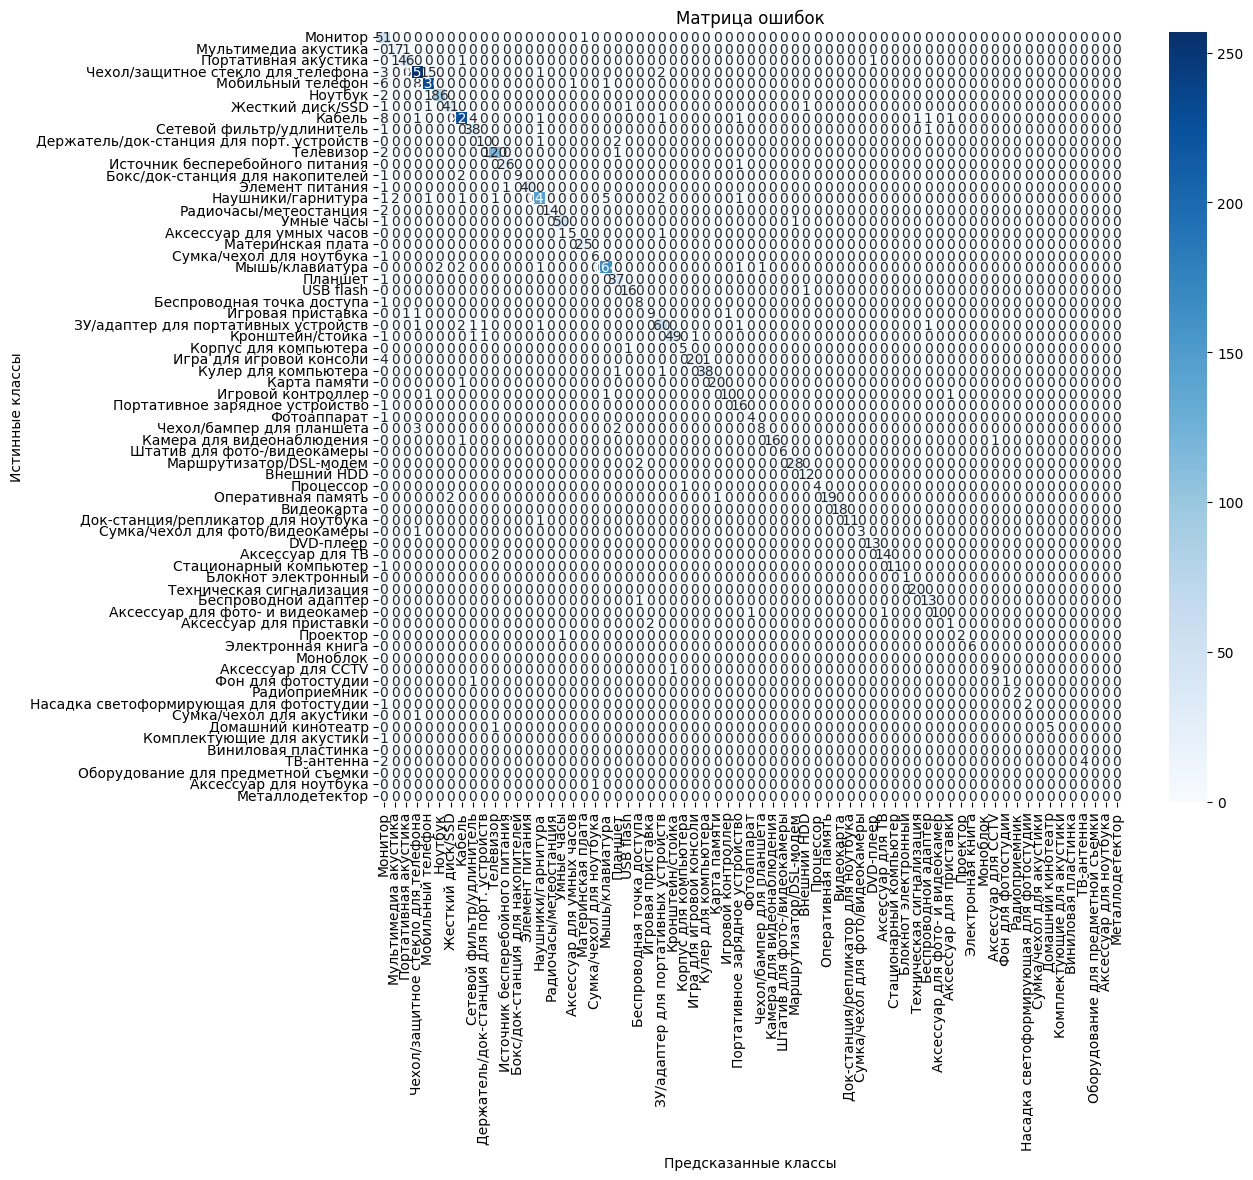

In [13]:
# Классификатор RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns

tokenized_texts = dataset['tokens'] # Все столбцы, кроме CategoryID
categories = dataset['CategoryID'] # Только столбец CategoryID

# Разделение данных на обучающую и тестовую выборки (опционально)
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(
    tokenized_texts, categories, test_size=0.2, random_state=42
)

# Векторизация токенов
vectorizer = CountVectorizer(analyzer=lambda x: x)
X_train = vectorizer.fit_transform(X_train_tokens)
X_test = vectorizer.transform(X_test_tokens)

# Создание модели RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42,
                                       max_depth=None,
                                       n_estimators=700,
                                       class_weight='balanced',
                                       max_features=5)

# Время начала обучения
time_start = time.time()

# Обучение модели на обучающем наборе данных
rf_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = lr_classifier.predict(X_test)

# Время обучения
times = time.time() - time_start

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Marko f1: {macro_f1:.2f}')
print(f'Matrix: {conf_matrix}')
print(f'Time: {times}s')

# Визуализация матрицы ошибок
id_to_name = pd.Series(category_list['CategoryName'], index=category_list['CategoryID']).to_dict()
labels = category_list['CategoryName'].tolist()
y_true_names = [id_to_name[id_] for id_ in y_test]
y_pred_names = [id_to_name[id_] for id_ in y_pred]

conf_matrix = confusion_matrix(y_true_names, y_pred_names, labels=labels)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  F

Лучшие параметры: {'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.8}
Лучшая точность (CV): 0.7930996740385599
Accuracy: 0.78
Recall: 0.78
Precision: 0.87
Matrix: [[29  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 36 ...  0  1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
Time: 15202.658126831055s


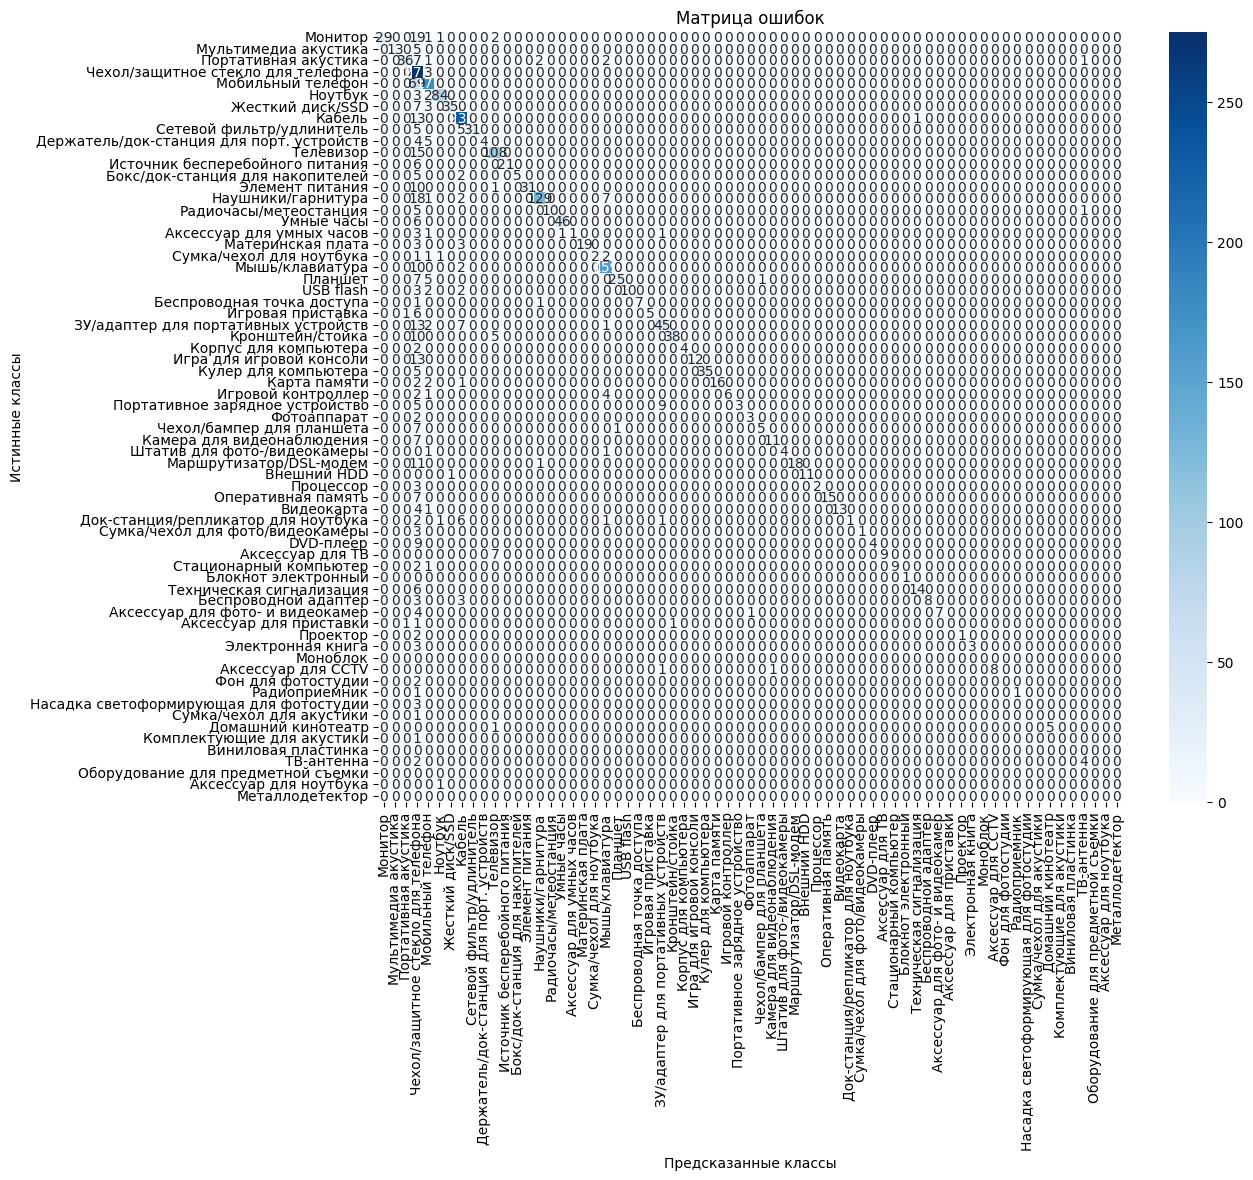

In [ ]:
# Классификатор градиентного бустинга
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns


tokenized_texts = dataset['tokens'] # Все столбцы, кроме CategoryID
categories = dataset['CategoryID'] # Только столбец CategoryID

# Разделение данных на обучающую и тестовую выборки (опционально)
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(
    tokenized_texts, categories, test_size=0.2, random_state=42
)

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    #'max_depth': [None, 3, 5],
    'subsample': [1.0, 0.8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Векторизация токенов
vectorizer = CountVectorizer(analyzer=lambda x: x)
X_train = vectorizer.fit_transform(X_train_tokens)
X_test = vectorizer.transform(X_test_tokens)

# Создание модели GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Время начала обучения
time_start = time.time()

# Обучение модели на обучающем наборе данных
#rf_classifier.fit(X_train, y_train)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Предсказание классов на тестовом наборе данных
#y_pred = lr_classifier.predict(X_test)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Время обучения
times = time.time() - time_start

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Matrix: {conf_matrix}')
print(f'Time: {times}s')

# Визуализация матрицы ошибок
id_to_name = pd.Series(category_list['CategoryName'], index=category_list['CategoryID']).to_dict()
labels = category_list['CategoryName'].tolist()
y_true_names = [id_to_name[id_] for id_ in y_test]
y_pred_names = [id_to_name[id_] for id_ in y_pred]

conf_matrix = confusion_matrix(y_true_names, y_pred_names, labels=labels)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

In [14]:
# Предобработка тестового датасета
datasettest = clean_text(datasettest)
datasettest['Query'] = datasettest['Query'].apply(remove_stopwords)
datasettest['Query'] = datasettest['Query'].apply(lemmatize_text_spacy)
datasettest['tokens'] = datasettest['Query'].apply(spacy_tokenize)
print(datasettest[:10])

   ID                                              Query  \
0   0          xiaomi 2k gaming monitor g27qi p27qcarggl   
1  15  смартфон xiaomi redmi note 14 8gb256 gb полуно...   
2  21                                           16 айфон   
3  22                                       cmf buds pro   
4  24                 защитный стекло samsung galaxy a25   
5  30   смартфон xiaomi 14 t 12gb256 gb 2406apnfag серый   
6  37  планшет huawei matepad se 11 8gb128 gb lte ags...   
7  45                                    кабель borofone   
8  56                           телевизор lg 65qned80t6a   
9  57                                      baseus cafule   

                                              tokens  
0   [xiaomi, 2k, gaming, monitor, g27qi, p27qcarggl]  
1  [смартфон, xiaomi, redmi, note, 14, 8gb256, gb...  
2                                        [16, айфон]  
3                                   [cmf, buds, pro]  
4           [защитный, стекло, samsung, galaxy, a25]  
5  [смарт

In [15]:
# Предсказание на тестовом датасете
X_new = vectorizer.transform(datasettest['tokens'])

predicted_category = rf_classifier.predict(X_new)
print("Предсказанная категория:", predicted_category[:10])

Предсказанная категория: [ 0  4  4 14  3  4 21  7 10  7]
